In [2]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [15]:
@model pitch_rate begin
    @parameter begin
        I_ENG2Fr_mount = 0
        I_ENG2Rr_mount = -0.4
        i_center_ENG = 100
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "pitch_rate") #シート名も指定して
end

pitch_rate (generic function with 1 method)

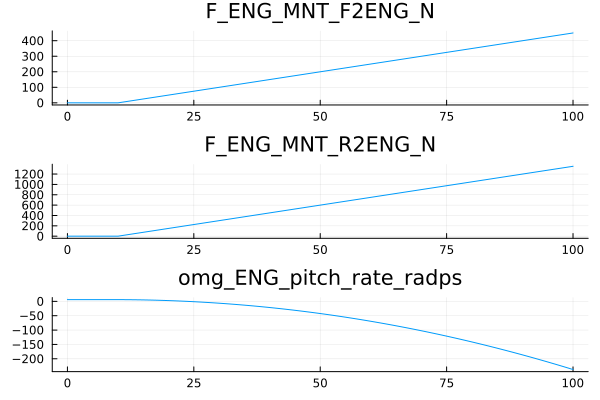

In [16]:
@model testblock begin
    @block begin
        b1 = pitch_rate()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => b1.F_ENG_MNT_F2ENG_N
        ramp2.out => b1.F_ENG_MNT_R2ENG_N
    end
    @scope begin
        b1.F_ENG_MNT_F2ENG_N => F_ENG_MNT_F2ENG_N
        b1.F_ENG_MNT_R2ENG_N => F_ENG_MNT_R2ENG_N
        b1.omg_ENG_pitch_rate_radps => omg_ENG_pitch_rate_radps
    end
end

m = @compile testblock()
res = simulate(m, tspan=[0, 100])
plot(res)

In [18]:
@model v_z_carbody begin
    @parameter begin
        M_ENG = 50
        g = 9.8
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "v_z_carbody")
end

v_z_carbody (generic function with 1 method)

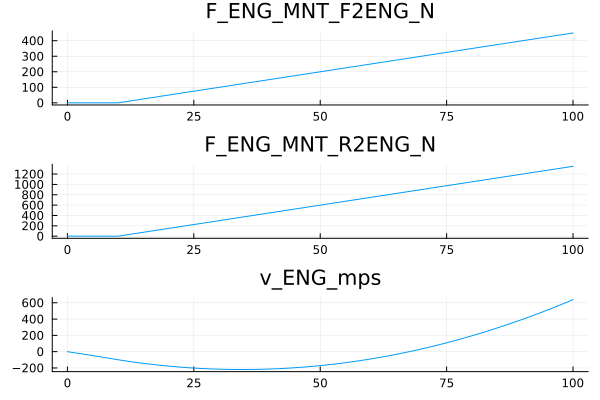

In [19]:
@model testblock begin
    @block begin
        b1 = v_z_carbody()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => b1.F_ENG_MNT_F2ENG_N
        ramp2.out => b1.F_ENG_MNT_R2ENG_N
    end
    @scope begin
        b1.F_ENG_MNT_F2ENG_N => F_ENG_MNT_F2ENG_N
        b1.F_ENG_MNT_R2ENG_N => F_ENG_MNT_R2ENG_N
        b1.v_ENG_mps => v_ENG_mps
    end
end

m = @compile testblock()
res = simulate(m, tspan=[0, 100])
plot(res)

In [20]:
@model z_velocity begin
    @parameter begin
        I_ENG2Fr_ENG_mount = 0
        I_ENG2Rr_ENG_mount = -0.4
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "z_velocity")
end

z_velocity (generic function with 1 method)

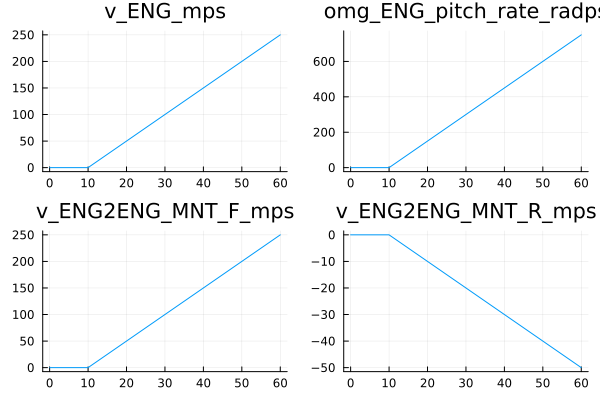

In [21]:
@model testblock begin
    @block begin
        b1 = z_velocity()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => b1.v_ENG_mps
        ramp2.out => b1.omg_ENG_pitch_rate_radps
    end
    @scope begin
        b1.v_ENG_mps => v_ENG_mps
        b1.omg_ENG_pitch_rate_radps => omg_ENG_pitch_rate_radps
        b1.v_ENG2ENG_MNT_F_mps => v_ENG2ENG_MNT_F_mps
        b1.v_ENG2ENG_MNT_R_mps => v_ENG2ENG_MNT_R_mps
    end
end

m = @compile testblock()
result = simulate(m, tspan=(0.0, 60.0));
plot(result, layout=(2,2))


In [22]:
@buildxml "models.xml" pitch_rate v_z_carbody z_velocity

6523

In [29]:
@model ENG_PNT begin
    @xmlmodel("../METI_Vertical_Vibration.drawio", "ENG_PNT")
end

ENG_PNT (generic function with 1 method)

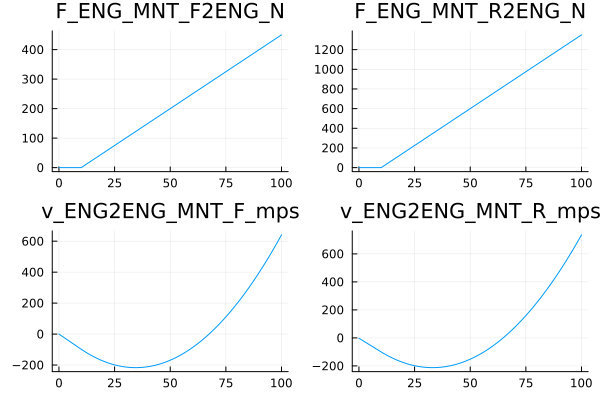

In [30]:
@model testblock begin
    @block begin
        m = ENG_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => m.F_ENG_MNT_F2ENG_N
        ramp2.out => m.F_ENG_MNT_R2ENG_N
    end
    @scope begin
        m.F_ENG_MNT_F2ENG_N => F_ENG_MNT_F2ENG_N
        m.F_ENG_MNT_R2ENG_N => F_ENG_MNT_R2ENG_N
        m.v_ENG2ENG_MNT_F_mps => v_ENG2ENG_MNT_F_mps
        m.v_ENG2ENG_MNT_R_mps => v_ENG2ENG_MNT_R_mps
    end
end

m = @compile testblock()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(2,2))